# Part One: Poker Hands

## Problem Statement
Assume five cards are dealt off the top of a randomly shuffled deck. Find the probability of dealing and the odds of dealing a flush.

## Solution

### Step 1: Make the "deck of cards"

In [2]:
# First, we make lists of the different suits and values
suits = ["spades", "hearts", "diamonds", "clubs"]
values = ["ace", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "jack", "queen", "king"]

# Now, we can use the above lists to make a list of tuples that represents the deck of cards
deck = []
for suit in suits:
    for value in values:
        deck.append((value, suit))

### Step 2: Make a function to shuffle the deck and deal five cards

In [3]:
import random

def shuffle_and_deal(deck: list, num_cards=5):
    # First, make a copy of the deck
    deck_copy = deck.copy()
    # Now, we can safely shuffle the copy
    random.shuffle(deck_copy)
    # Now, deal the specified number of cards (default 5) into a list that we then return
    ret = []
    for i in range(num_cards):
        ret.append(deck_copy.pop())
    return ret

### Step 3: Make a function to check for a pair and/or a flush

In [4]:
def check_pair_and_flush(hand: list):
    # First, check if we have a flush
    first_card_suit = hand[0][1] # get suit of first card
    flush = True
    for card in hand:
        # if the suit is different, we don't have a flush
        if (card[1] != first_card_suit):
            flush = False
            break
    
    # Now, we should check if we have one (and only one) pair
    pair_count = 0
    for i in range(len(hand)):
        for j in range(i + 1, len(hand)):
            if(hand[i][0] == hand[j][0]):
                pair_count += 1
    one_pair = pair_count == 1
    
    return (one_pair, flush)
        

### Step 4: Run a simulation to get the odds of each hand

In [20]:
total_simulations = 1000000 # Number of times to simulate
pair_count = 0
flush_count = 0
for i in range(total_simulations):
    hand = shuffle_and_deal(deck) # deal the hand
    results = check_pair_and_flush(hand) # check for a single pair and for a flush
    
    if (results[0]):
        pair_count += 1
        # increment pair count if there's a pair
    
    if(results[1]):
        flush_count += 1
        # increment flush count if there's a flush

# Now, we just do a nice output of the numbers
print(total_simulations, "simulations were run")
print()
print("Number of pairs:", pair_count)
print("Number of flushes:", flush_count)
print()
chance_output_str = "Percent chance of a {hand}: {chance:.4f}%"
print(chance_output_str.format(hand="pair", chance=(pair_count/total_simulations)*100))
print(chance_output_str.format(hand="flush", chance=(flush_count/total_simulations)*100))

1000000 simulations were run

Number of pairs: 423939
Number of flushes: 1983

Percent chance of a pair: 42.3939%
Percent chance of a flush: 0.1983%


# Part Two: Chutes and Ladders

## Problem Statement
Using Monte Carlo simulation, find the minimum and average number of turns to win the game.

Asssume that a 4-sided dice is used with the following gameboard:
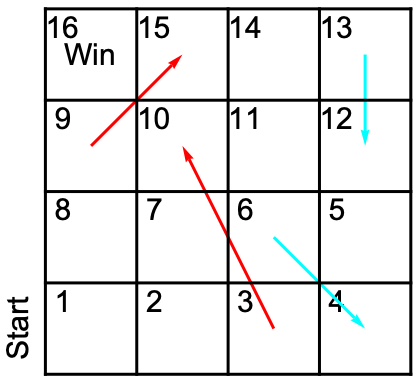

## Solution

In [32]:
roll_dice = lambda d: random.randint(1,d) # one line function (mostly for convenience) to roll a d-sided dice


3
